### ***Data Analysis Project (Assignment 1) - Rafa Africa, Stat 301***

### **(1) Data Description (2 or 3 sentences and no more than 1 table)**

Source: https://www.kaggle.com/datasets/saurabhbadole/restaurant-tips-dataset

The Restaurant Tips Dataset was sourced from Kaggle and was collected from a restaurant over time. It gives information on tipping behavior at restaurants and has 244 observations with 7 variables that being total_bill, tip, sex, smoker, day, time, and size. These variables may influence influence the tip given by a customer and this data has been collected to find possible factors and correlation between the variables and tipping. 

| Variable | Type | Description |
| --- | --- | --- |
| total_bill | float | Total bill amount |
| tip | float | Tip amount |
| sex | categorical | Male or Female |
| smoker | categorical | Yes or No |
| day | categorical | Thurs, Friday, Saturday, or Sunday |
| time | categorical | Lunch or Dinner |
| size | integer | Number of people in party |

### **(2) Question (2 or 3 sentences)**

a) Clearly state the question you want try to answer using the dataset. Your question should involve one random variable of interest (the response) and *more than one* explanatory variables in the dataset.

The question to be answered is how the tip is associated the total bill, gender, time, and day. The response variable will be tip amount, and the exploratory variables are total bill, gender, time, and day. The goal here is to determine which factors have the most significant correlation on the tip amount while dropping smoking and the size of the party as these factors may be less relevant to the model. This project will focus on inference on what variables are most likely to affect the size of the tip and we will not be focusing on other covariates aside from the ones stated in this model. 

### **(3) Exploratory Data Analysis and Visualization (no more than one plot per student)**

In this part, you will write a reproducible code to:

- Demonstrate that the dataset can be loaded into R.
- Clean and wrangle your data into a tidy format.
- Propose a visualization that you consider relevant to address your question or to explore the data.
  
This plot aims shows the relation of Tip Amount (response) against the exploratory variables Total Bill, Time, and Day. This is a useful plot showing how these variables affect the size of the tip. To add it can be observed that there is minimal data on sat/sun lunch and thurs dinner which could be further investigated and the largest tips come from Males on a sunday dinner.

In [1]:
library(ggplot2)
library(dplyr)
library(tidyverse)
library(broom)
library(httr) 


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
invisible(
GET(
  url = "https://www.kaggle.com/api/v1/datasets/download/saurabhbadole/restaurant-tips-dataset",
  authenticate('victorraphaelafrica','50f86873d868000167fada6bf61a829b', type = "basic"),
  write_disk("restaurant-tips-dataset.zip", overwrite = TRUE)
    )
)

unzip("restaurant-tips-dataset.zip")

tips <- read.csv("tips.csv")

head(tips)


,total_bill,tip,sex,smoker,day,time,size
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
6,25.29,4.71,Male,No,Sun,Dinner,4


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.91301661,0.328147446,2.7823365,5.831524e-03
total_bill,0.10507452,0.007632695,13.7663722,4.453636e-32
sexMale,-0.03839905,0.142429869,-0.2695997,7.877028e-01
timeLunch,0.10785563,0.445350786,0.2421813,8.088491e-01
daySat,-0.04174060,0.308487255,-0.1353074,8.924837e-01
daySun,0.12177397,0.312515451,0.3896575,6.971398e-01
dayThur,-0.08710651,0.385218859,-0.2261221,8.213013e-01


`geom_smooth()` using formula = 'y ~ x'


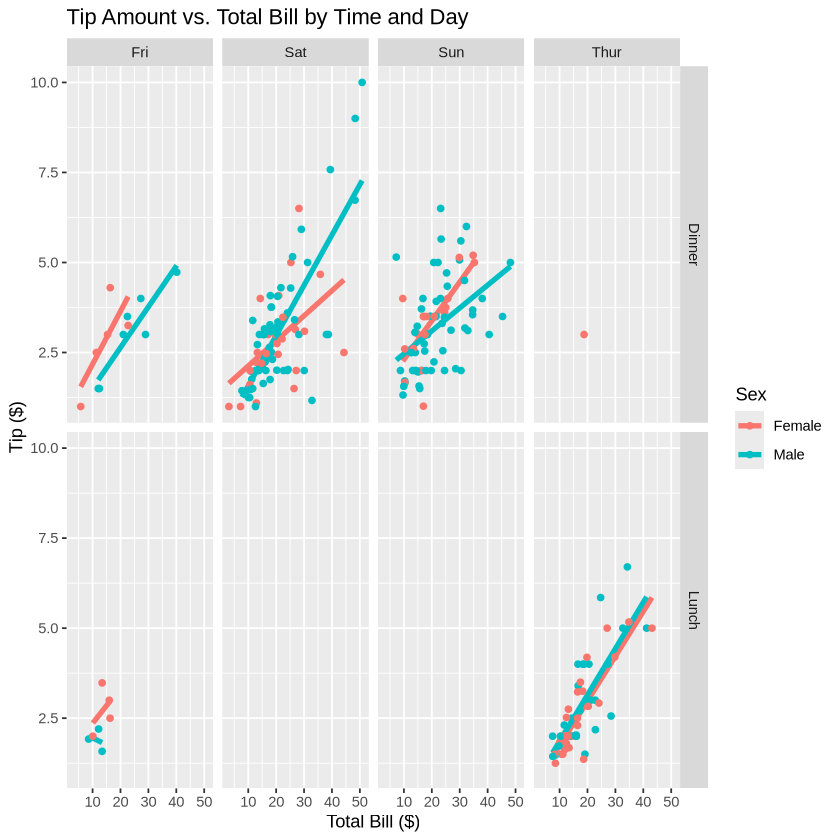

In [3]:
tips <- tips %>%
  mutate(
    sex = as.factor(sex),
    smoker = as.factor(smoker),
    day = as.factor(day),
    time = as.factor(time)
  )

glm_model_tip <- glm(tip ~ total_bill + sex + time + day,
                 data = tips)
glm_model_tip_results <- tidy(glm_model_tip)
glm_model_tip_results #model results


# Create the scatter plot with facets
tips_plot <- 
  tips %>%
  ggplot(aes(x = total_bill, y = tip, color = sex)) +  
  geom_smooth(method = "lm", se = FALSE, linewidth = 1.5) +  
  geom_point() +
  facet_grid(time ~ day) +
  ggtitle("Tip Amount vs. Total Bill by Time and Day") +
  xlab("Total Bill ($)") +
  ylab("Tip ($)") +
  labs(color = "Sex")  

tips_plot

### ****Methods and Plan & Computational Code and Output (Individual assignment 2)****

### ****(1) Methods and Plan****

Propose one method to address your question of interest using the selected dataset and explain why it was chosen. Just a high-level thinking of what model you are planning to use. 

In your explanation, respond to the following questions:

Why is this method appropriate?
Which assumptions are required, if any, to apply the method selected?
What are the potential limitations or weaknesses of the method selected?
Note 1: you can relax/expand your question(s) from assignment 1, just change them in the corresponding section from previous assignment.

This analysis will use a Poisson regression model to examine the relationship between tipping behavior and the factors total bill, gender, time, day, and party size. This is a valid method as the outcome (tip amount) is a count variable and properly aligns with the assumptions of a Poisson distribution. This being, counts data and is non-negative, the mean and variance of the response variable are equal (equidispersion) and the counts are independent of each other. A possible limitation to this method would be if the variance of tips is greater than the mean which would make this method unsuitable. The Poisson model also does not account for unobserved heterogeneity, which could lead to biased results.

### ****(2)  Computational Code and Output****

In this section you will implement the method suggested in part (1).  

a) Write a computation code to implement the method proposed in part (1)

b) Write a computational code to implement the method proposed in part (1)

c) Use *only one* visualization or table to report results. 

d) In 3 or 4 sentences give a brief interpretation of the results. If needed, comment on any unexpected result or potential problems with the analysis, and possible ways to address issues encountered. If results are as expected, explain how they address the question of interest. **Do not exceed the 4 sentences limit**.

In [4]:
# Prepare the data
tips <- tips %>%
  mutate(
    sex = as.factor(sex),
    smoker = as.factor(smoker),
    day = as.factor(day),
    time = as.factor(time),
    size = as.factor(size),
    tip = round(tip)  # Optionally round the tip to nearest integer if needed
  )

# Fit a Poisson Model
poisson_tip_model <- glm(tip ~.,
                           data = tips,
                           family = poisson)

summary(poisson_tip_model)

# Poisson Plot for future use
# glm_plot <- tips %>%
#   ggplot() +
#   geom_smooth(aes(x = total_bill, y = tip),
#               method = 'glm',
#               se = FALSE,
#               method.args = list(family = poisson)) +
#   geom_point(aes(x = total_bill, y = tip)) +
#   ggtitle("Poisson Regression: Tip Amount vs. Total Bill") +
#   xlab("Total Bill ($)") +
#   ylab("Tip ($)")

# glm_plot


Call:
glm(formula = tip ~ ., family = poisson, data = tips)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.285888   0.448364   0.638    0.524    
total_bill   0.027172   0.004860   5.591 2.25e-08 ***
sexMale     -0.012325   0.081347  -0.152    0.880    
smokerYes   -0.033083   0.083597  -0.396    0.692    
daySat      -0.083215   0.176498  -0.471    0.637    
daySun       0.002054   0.180505   0.011    0.991    
dayThur     -0.010195   0.249352  -0.041    0.967    
timeLunch   -0.035707   0.273850  -0.130    0.896    
size2        0.266128   0.418316   0.636    0.525    
size3        0.341523   0.430632   0.793    0.428    
size4        0.383059   0.435598   0.879    0.379    
size5        0.315493   0.484448   0.651    0.515    
size6        0.436393   0.492459   0.886    0.376    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 145.970  on 243  degrees

d) In 3 or 4 sentences give a brief interpretation of the results. If needed, comment on any unexpected result or potential problems with the analysis, and possible ways to address issues encountered. If results are as expected, explain how they address the question of interest. Do not exceed the 4 sentences limit.

The results show that the total bill has a significant positive effect on tip amount, indicating that as the total bill increases, tips increase as well. The GLM model shows that other predictors, such as gender, smoking status, day of the week, meal time, and party size, do not show statistically significant effects on tipping behavior. An unexpected result is that factors such as party size, gender, or time of day are not significantly associated with tipping behavior, which may be due to unaccounted variables like service quality or customer satisfaction. Future analyses incorporating these factors could help determine whether there could be a potential association with increased tipping behavior.

### ***3) Mechanics***

You must submit two files:

the source Jupyter notebook (.ipynb file)
the rendered final document (.html file)
Add the new content at the end of your existing notebook containing the data description, question, visualization.

Your notebook must be fully reproducible! Don’t download data to your local server/machine and read it back. Ask your TA if you don’t remember how to do that differently.

As mentioned before, it is fine to share ideas with other group members. However, you don’t need to agree on a unique common method for the group project. In fact, usually the analysis comprise different methods with different strengths and limitations! Regardless of how many methods are proposed within each group, each team member needs to propose one method and justify its choice.

A rubric will be added soon. Check it before submitting.